In [3]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, functions as f
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
import pandas as pd
import sqlalchemy as db
import mysql.connector


spark = SparkSession.builder.appName("hockey").config("spark.some.config.option", "some-value").getOrCreate()

df = pd.read_csv("sportTweets.csv")

# specify database configurations
db_connection = mysql.connector.connect(host = 'database',
                                        port = 3306, 
                                        user = 'symfony', 
                                        passwd = 'symfony', 
                                        db = 'symfony_docker')

# create and use a new database
db_cursor = db_connection.cursor()
db_cursor.execute("USE symfony_docker;")

#db_cursor.execute("CREATE TABLE Statistics(year YEAR, count INT);")



sparkDF = spark.createDataFrame(df)
tweets_2021 = sparkDF.filter(sparkDF['Date'] >= '2021-01-01')
tweets_2020 = sparkDF.filter((sparkDF['Date']>='2020-01-01') & (sparkDF['Date']<='2020-12-31'))
tweets_2019 = sparkDF.filter((sparkDF['Date']>='2019-01-01') & (sparkDF['Date']<='2019-12-31'))

num_of_hockey_tweets_2021 = tweets_2021.selectExpr("lower(Tweet) as lower")\
.withColumn("cleaned", f.regexp_replace(f.col("lower"),"[^a-z |*]", " "))\
.filter(col("cleaned").contains("hockey"))\
.count()
num_of_hockey_tweets_2020 = tweets_2020.selectExpr("lower(Tweet) as lower")\
.withColumn("cleaned", f.regexp_replace(f.col("lower"),"[^a-z |*]", " "))\
.filter(col("cleaned").contains("hockey"))\
.count()
num_of_hockey_tweets_2019 = tweets_2019.selectExpr("lower(Tweet) as lower")\
.withColumn("cleaned", f.regexp_replace(f.col("lower"),"[^a-z |*]", " "))\
.filter(col("cleaned").contains("hockey"))\
.count()

columns = ['Period', 'Count']
data = [('2019', num_of_hockey_tweets_2019),('2020', num_of_hockey_tweets_2020),('2021', num_of_hockey_tweets_2021)]

sql = "INSERT INTO Statistics(year,count) VALUES(%s, %s)"
# Create a new record
db_cursor.executemany(sql,data)

# connection is not autocommit by default. So we must commit to save our changes.
db_connection.commit()

#rdd = spark.createDataFrame(data).toDF(*columns)
#rdd.toPandas().to_csv('numOfHockeyTweets19-21.csv')

In [2]:
pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.6/363.6 KB 3.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


There are 32469 words in the combination of all cells in column words.


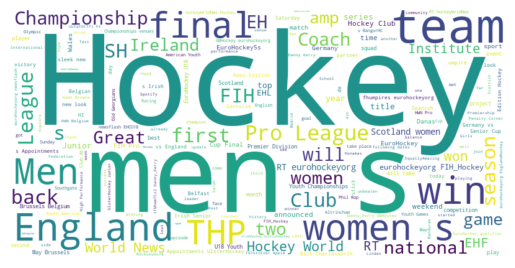

In [52]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, functions as f
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

#% matplotlib inline


spark = SparkSession.builder.appName("hockey").config("spark.some.config.option", "some-value").getOrCreate()

df = pd.read_csv("tweetsMay.csv")
DF = pd.DataFrame(df)
#sparkDF = spark.createDataFrame(df)
#wordsHockeyTweets = sparkDF.selectExpr("lower(Tweet) as lowerTweets")\
#.withColumn("cleaned", f.regexp_replace(f.col("lowerTweets"), "[^a-z |*]", "  "))\
#.filter(col("cleaned").contains("hockey"))\
#.select("*", f.expr("split(cleaned, ' ') splitted"))\
#.select(f.explode(f.col("splitted")).alias("words"))\
#.where("length(words)>4")\
#.groupBy("words").count()\
#.orderBy(f.desc("count")).limit(50)
#wordsHockeyTweets.show()
#wordsHockeyTweets

#Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "co", "t"])

text = " ".join(review for review in  DF.tweets.astype(str) )
print ("There are {} words in the combination of all cells in column words.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig("img/wordcloud.png", format="png")
wordcloud.to_file("tweets.png")
plt.show()